In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import requests
import datetime
import pycountry as pc

countries_list = ["DK"]
# countries_list = ["AU", "BE", "BG", "CH", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "HU", "IT", "IS", "LT", "LV", "LU", "NL", "NO", "PL", "PT", "SE", "SL", "UK"]
a3_countries_list = []
for country in countries_list[:-1]:
    #print(country)
    a3_countries_list.append(pc.countries.get(alpha_2=country).alpha_3)
# a3_countries_list.append("GBR")
#print(a3_countries_list)
download_data = False
# folder_eu = "https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/"
# file_eu = "csv/DEMO_R_MWK_TS$DEFAULTVIEW"
# file_eu = "csv/DEMO_MMONTH__custom_26121"
# file_eu = "csv/DEMO_R_MWK_TS__custom_26098"

# folder_uk = "https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/"

# weeknr = datetime.date(2010, 6, 16).isocalendar()[1]
# filelist_uk = []
# for year in range(2010, 2021):
#     if year >= 2020:
#         filelist_uk.append("{0}/publishedweek{1}{0}.xlsx".format(year, 38))
#     if 2019 >= year > 2016:
#         filelist_uk.append("{0}/publishedweek52{0}.xls".format(year))
#     if 2016 >= year:
#         filelist_uk.append("{0}/publishedweek{0}.xls".format(year))

# filelist_uk = ["2020/publishedweek382020.xlsx", "2019/publishedweek522020.xls", 
#                 "2018/publishedweek522020.xls", "2017/publishedweek522020.xls", 
#                 "2016/publishedweek522020.xls", "2015/publishedweek2020.xls", 
#                 "2014/publishedweek2014.xls", "2013/publishedweek2020.xls", 
#                 "2012/publishedweek2012.xls", "2011/publishedweek2020.xls"]


# file_uk = "2020/publishedweek382020.xlsx"

# filelist_uk

# if download_data:
#     requests.get(url).content


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


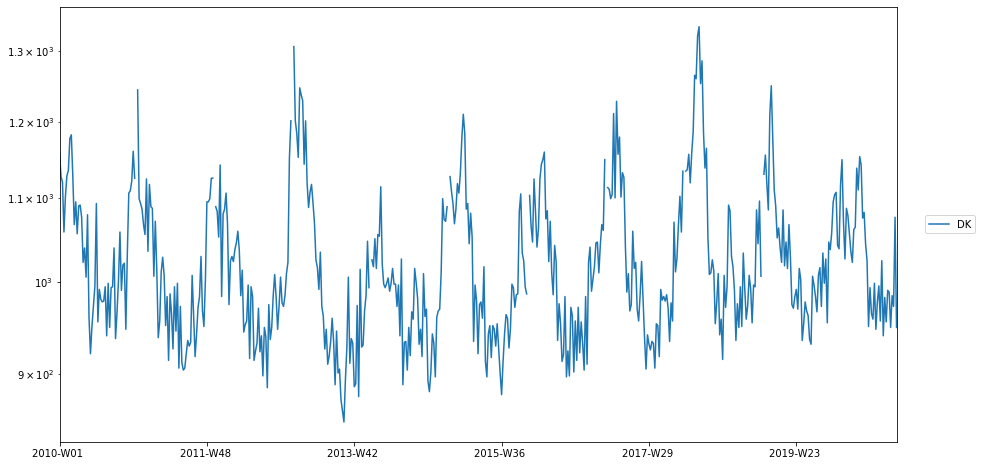

In [2]:
folder_eu_weekly = "https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/"
# file_eu_weekly = "csv/DEMO_R_MWK_TS$DEFAULTVIEW"
# file_eu_weekly = "csv/DEMO_MMONTH__custom_26121"
# file_eu_weekly = "csv/DEMO_R_MWK_10__custom_32605"
file_eu_weekly = "csv/DEMO_R_MWK_TS__custom_26098"
eu_weekly_df = pd.read_csv(folder_eu_weekly + file_eu_weekly, sep='[",",";"]', engine="python", parse_dates=True)
eu_weekly_df.rename(columns = {'geo\TIME_PERIOD':'geo'}, inplace=True)
eu_weekly_df.replace(r':', np.NaN, regex=True, inplace=True)
# eu_weekly_df.fillna(0, inplace = True)
eu_weekly_df.replace([r'p$'], [r''], regex=True, inplace=True)
eu_weekly_df.replace([r'e$'], [r''], regex=True, inplace=True)
eu_weekly_df = eu_weekly_df[(eu_weekly_df["sex"]=="T") & (eu_weekly_df["geo"].isin(countries_list))]
eu_weekly_df.drop(columns=["freq", "unit", "sex"], inplace=True)
eu_weekly_df = eu_weekly_df.T
eu_weekly_df.columns = eu_weekly_df.loc["geo"]
eu_weekly_df.drop(["geo"], inplace=True)
# print([i for i in countries_list if i not in eu_weekly_df.columns])
# eu_weekly_df.apply(pd.to_numeric, errors="ignore")
eu_weekly_df = eu_weekly_df.apply(pd.to_numeric)
#pd.to_datetime(eu_weekly_df.index)#, format="%Y-W%W")
#eu_weekly_df.index
eu_weekly_df.loc["2010-W01":].plot(figsize=(15,8))
plt.yscale("log")
plt.legend(loc="right", bbox_to_anchor=(1.1, 0.5))
spec_list = []
# t = np.arange(len(eu_weekly_df[country]))
# for country in countries_list:
#     spec = np.fft.fft(eu_weekly_df[country])
#     print(spec)
#     freq = np.fft.fftfreq(t.shape[-1])
#     # spec_list.append(spec)
#     plt.plot(freq, spec.real)

In [24]:
spec_list = []
for country in countries_list:
    t = np.arange(len(eu_weekly_df[country]))
    mask = np.isfinite(eu_weekly_df[country])
    print(mask)
    i_list = np.arange(len(eu_weekly_df.index[mask]))
    print(i_list)
    print(list(eu_weekly_df[country][mask]))
    weekly_filtered = np.interp(eu_weekly_df[country], i_list, list(eu_weekly_df[country][mask]))
    spec = np.fft.fft(weekly_filtered)
    print(spec)
    # freq = np.fft.fftfreq(t.shape[-1])
    # spec_list.append(spec)
    # plt.plot(freq, spec.real, freq, spec.imag)

2000-W01     False
2000-W02     False
2000-W03     False
2000-W04     False
2000-W05     False
             ...  
2020-W35      True
2020-W36      True
2020-W37      True
2020-W38      True
2020-W39      True
Name: DK, Length: 1101, dtype: bool
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 

In [4]:
folder_eu_daily = "https://opendata.ecdc.europa.eu/covid19/casedistribution/"
file_eu_daily = "csv"
date_parser_daily = lambda x: pd.datetime.strptime(str(x), "%d/%m/%Y")
eu_daily_df = pd.read_csv(folder_eu_daily + file_eu_daily, index_col="dateRep", parse_dates=["dateRep"], date_parser=date_parser_daily)
def moving_avg(data, avg_margin=3):
    return [0]*avg_margin + [sum(data[i-avg_margin:i+avg_margin+1])/(1+2*avg_margin) for i in range(avg_margin, len(data)-avg_margin)] + [0]*avg_margin
# eu_daily_df["deaths_smooth"] = moving_avg(eu_daily_df["deaths"])
# eu_daily_df

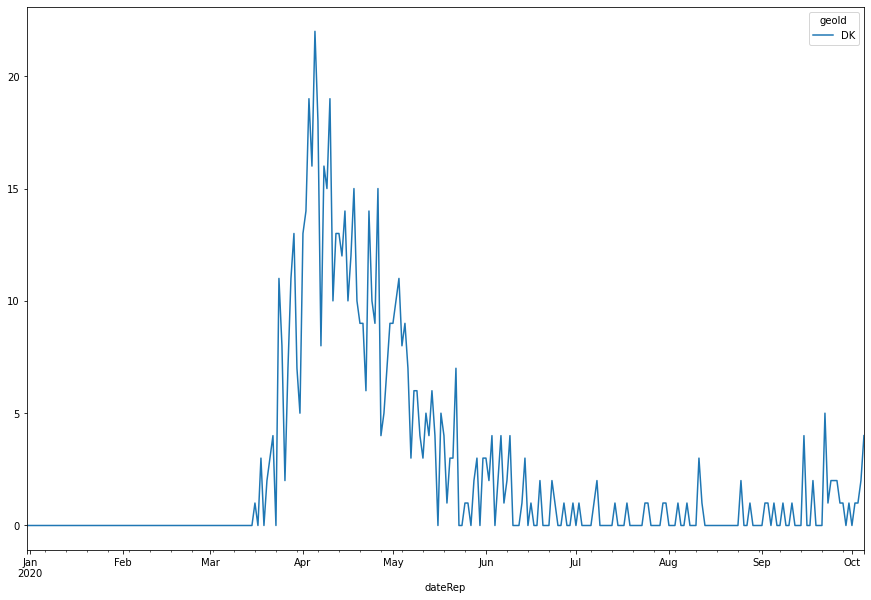

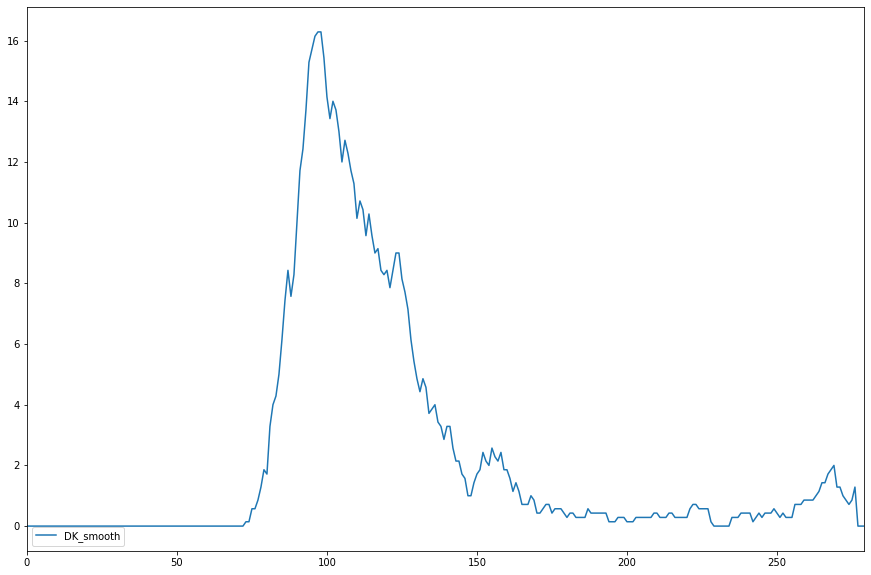

In [5]:
deaths_daily_df = eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack()
deaths_daily_smooth_df = pd.DataFrame()
for nation in countries_list:
    deaths_daily_smooth_df[nation + "_smooth"] = moving_avg(deaths_daily_df[nation])
deaths_daily_df.plot(figsize=(15,10))
deaths_daily_smooth_df.plot(figsize=(15,10))
plt.legend(loc="lower left")
plt.savefig("daily_eu_deaths.pdf")
# There is obviously an error in the spanish data here... this error is also present in the JHU data.

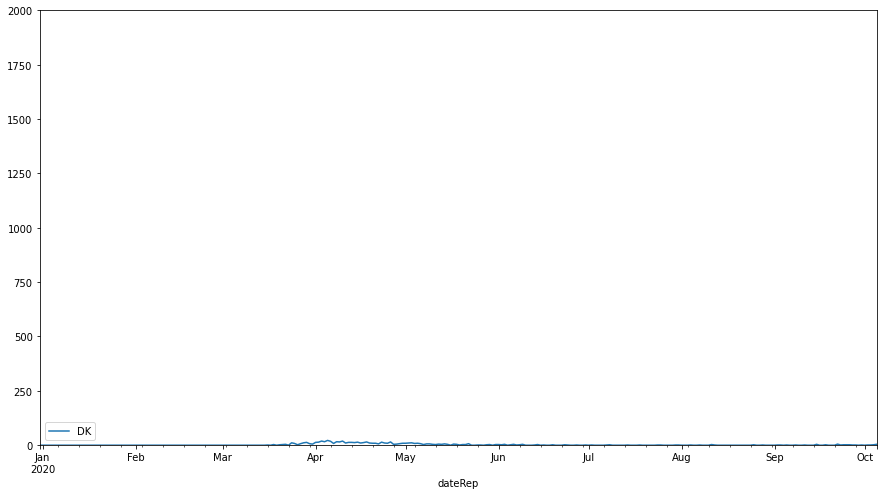

In [6]:
# eu_daily_df[eu_daily_df["geoId"]=="ES"].loc["2020-05":"2020-06"]# and eu_daily_df["deaths"]<0]
# eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack().plot(figsize=(15,8))
deaths_daily_df.plot(figsize=(15,8))
plt.ylim(0,2000)
plt.legend(loc="lower left")
plt.savefig("daily_eu_deaths_nice_axis.pdf")

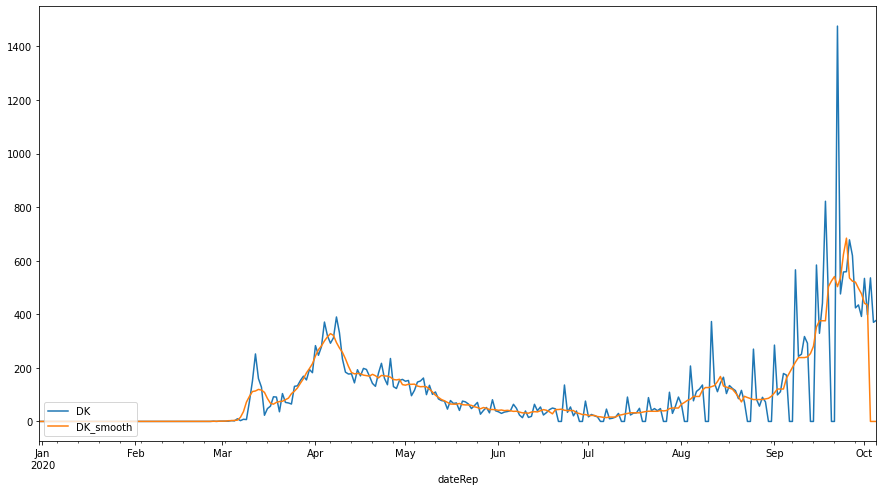

In [7]:
cases_daily_df = eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["cases"].unstack()
for nation in countries_list:
    cases_daily_df[nation + "_smooth"] = moving_avg(cases_daily_df[nation])
cases_daily_df.plot(figsize=(15,8))
# plt.ylim(0,2000)
plt.legend(loc="lower left")
plt.savefig("daily_eu_cases_nice_axis.pdf")
# eu_daily_df

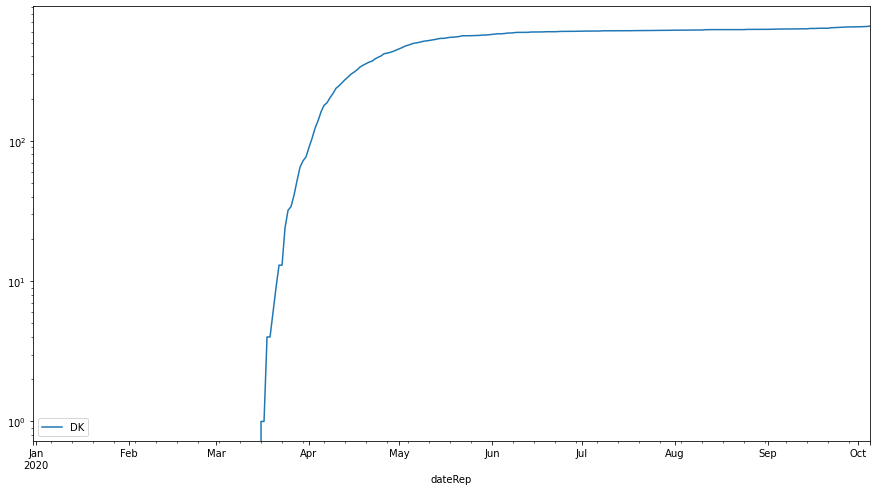

In [8]:
eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack().cumsum().plot(figsize=(15,8))
plt.yscale("log")
plt.legend(loc="lower left")
plt.savefig("cumulated_eu_deaths_nice_axis.pdf")

In [9]:
folder_response = "https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/"
file_response = "OxCGRT_latest.csv"
date_parser_response = lambda x: pd.datetime.strptime(str(x), "%Y%m%d")
response_df = pd.read_csv(folder_response + file_response, index_col="Date", parse_dates=["Date"], date_parser=date_parser_response)
response_df
stringency_df = response_df[response_df["CountryCode"].isin(a3_countries_list)].groupby(["Date", "CountryCode"]).sum()["StringencyIndex"].unstack()
stringency_df.plot(figsize=(15,8))

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TypeError: no numeric data to plot